<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Nasdaq_Four_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
!pip install yfinance;

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf

In [ ]:
from datetime import datetime

In [ ]:
stok_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [ ]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [ ]:
for stock in stok_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-11,3162.689941,3180.000000,3054.679932,3065.870117,3065.870117,3851600,AMAZON
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4161500,AMAZON
2022-02-15,3152.110107,3160.139893,3092.750000,3130.209961,3130.209961,2848500,AMAZON
2022-02-16,3115.810059,3176.679932,3094.689941,3162.010010,3162.010010,2635200,AMAZON
2022-02-17,3162.919922,3206.979980,3090.000000,3093.050049,3093.050049,3201600,AMAZON
2022-02-18,3109.989990,3109.989990,3017.860107,3052.030029,3052.030029,3168200,AMAZON
2022-02-22,3009.570068,3059.649902,2969.709961,3003.949951,3003.949951,3306400,AMAZON
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,AMAZON
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,AMAZON


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,146.428736,148.006166,145.003162,146.571779,146.130742,8.910178e+07
std,17.295097,17.612750,16.992503,17.328208,17.511459,2.804364e+07
min,119.029999,120.400002,116.209999,116.360001,115.672493,4.100000e+07
25%,131.190002,132.850006,130.240005,131.789993,131.160461,6.902310e+07
50%,146.210007,147.710007,145.550003,146.389999,145.960739,8.456650e+07
75%,158.979996,161.800003,156.529999,159.779999,159.576691,1.048186e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-02-26 to 2022-02-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


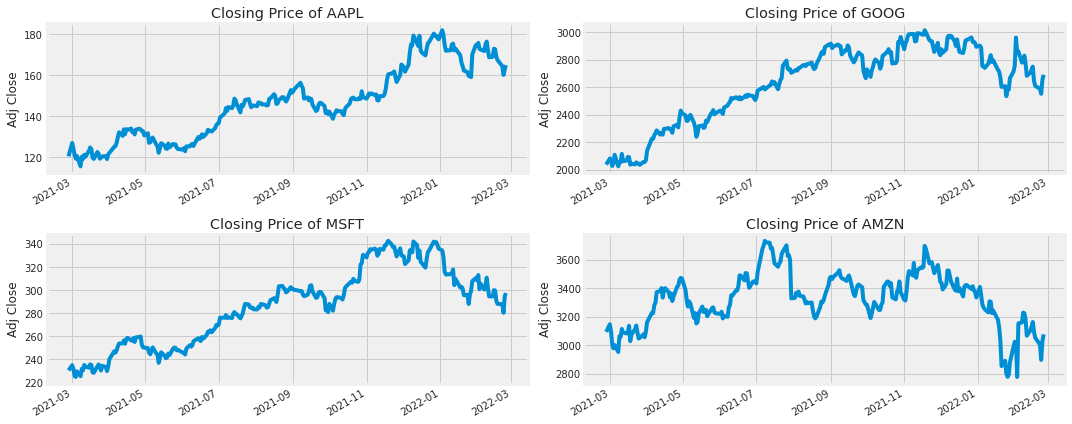

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stok_list[i - 1]}")
    plt.tight_layout()

Plot total volume of stocks treaded in a day

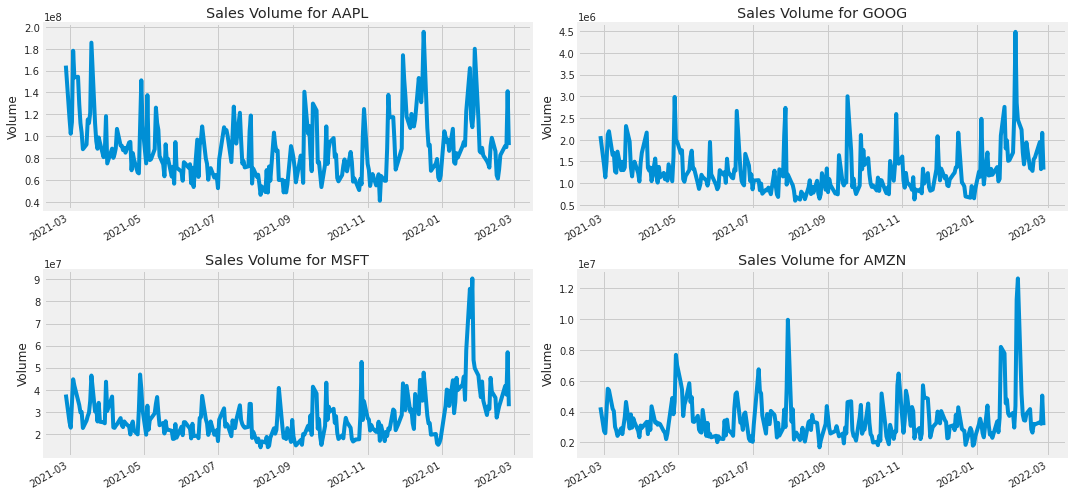

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stok_list[i - 1]}")
    
plt.tight_layout()

#Plot moving average of the various stocks

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

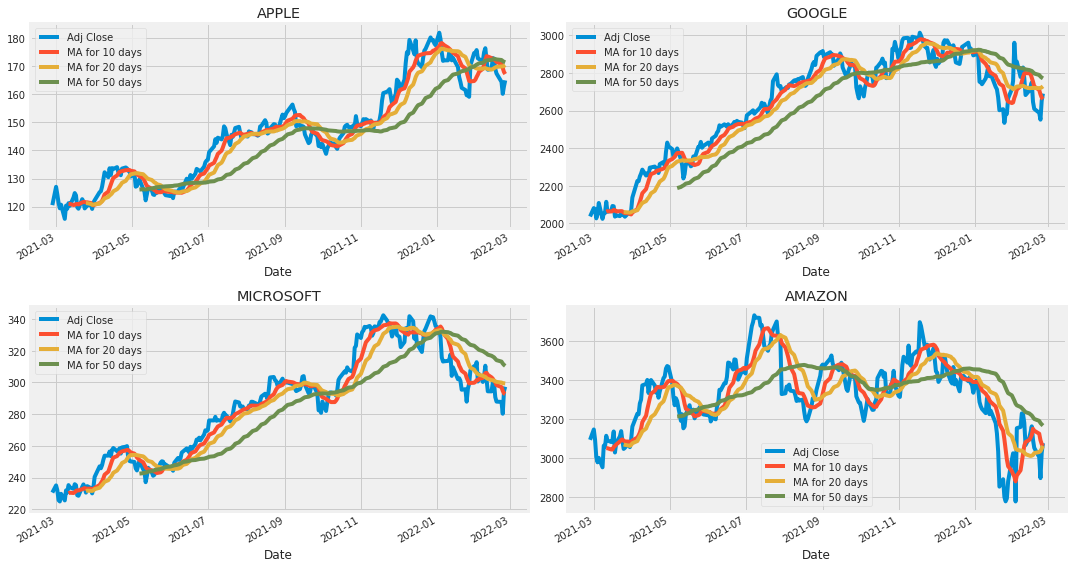

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

What was the daily return of the stock on average?

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
  

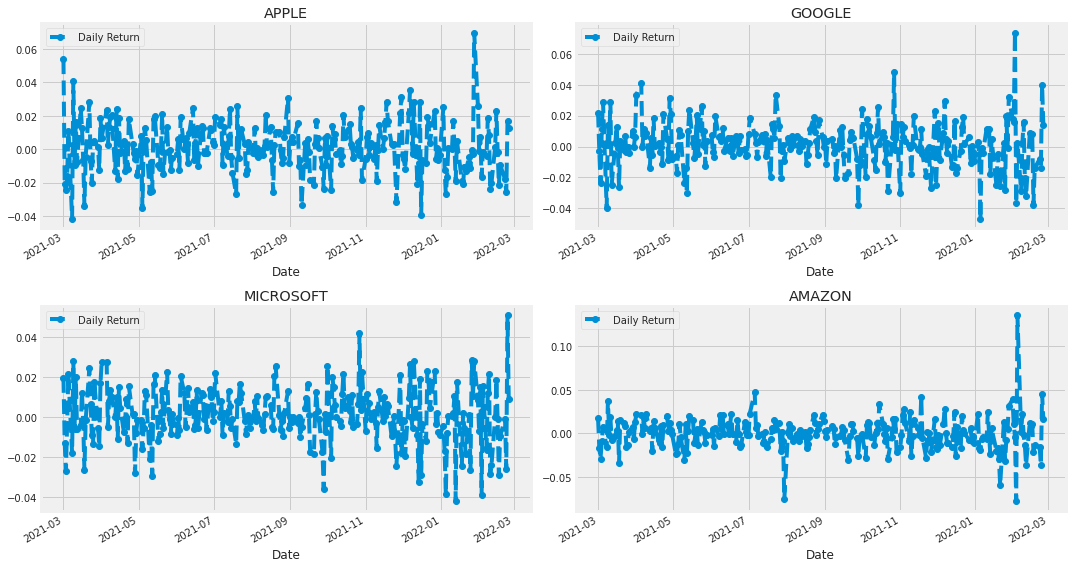

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

#Average daily return using histogram

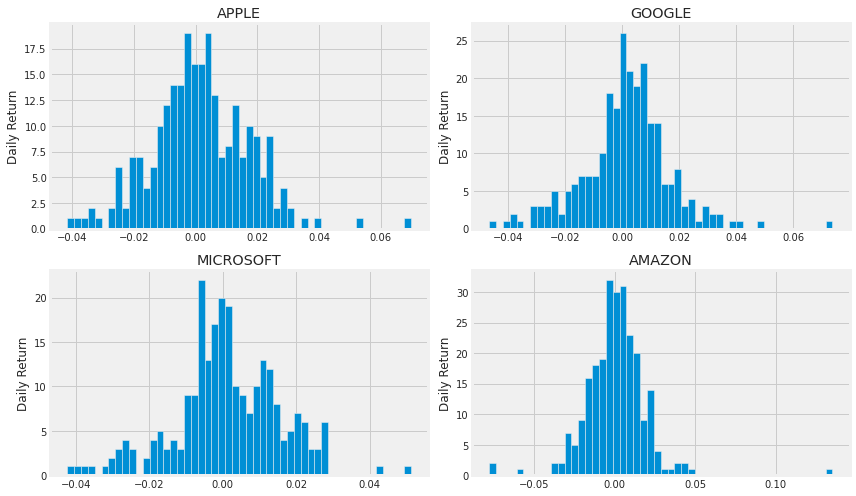

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#To get correlation between different stock price

In [ ]:
closing_df = YahooDailyReader(stok_list, 'yahoo', start, end)['Adj Close']

NameError: ignored

In [ ]:
import pandas
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
closing_df = pdr.get_data_yahoo(stok_list, start, end)['Adj Close']
print(closing_df)

[*********************100%***********************]  4 of 4 completed
                  AAPL         AMZN         GOOG        MSFT
Date                                                        
2021-02-26  120.543549  3092.929932  2036.859985  230.502472
2021-03-01  127.034966  3146.139893  2081.510010  235.025620
2021-03-02  124.380745  3094.530029  2075.840088  231.980423
2021-03-03  121.338821  3005.000000  2026.709961  225.721405
2021-03-04  119.420219  2977.570068  2049.090088  224.898102
...                ...          ...          ...         ...
2022-02-18  167.300003  3052.030029  2609.350098  287.929993
2022-02-22  164.320007  3003.949951  2588.050049  287.720001
2022-02-23  160.070007  2896.540039  2551.699951  280.269989
2022-02-24  162.740005  3027.159912  2653.469971  294.589996
2022-02-25  164.850006  3075.770020  2690.389893  297.309998

[253 rows x 4 columns]


In [ ]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-02-26,120.543549,3092.929932,2036.859985,230.502472
2021-03-01,127.034966,3146.139893,2081.510010,235.025620
2021-03-02,124.380745,3094.530029,2075.840088,231.980423
2021-03-03,121.338821,3005.000000,2026.709961,225.721405
2021-03-04,119.420219,2977.570068,2049.090088,224.898102


In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-02-26,NaN,NaN,NaN,NaN
2021-03-01,0.053851,0.017204,0.021921,0.019623
2021-03-02,-0.020894,-0.016404,-0.002724,-0.012957
2021-03-03,-0.024457,-0.028932,-0.023668,-0.026981
2021-03-04,-0.015812,-0.009128,0.011043,-0.003647


In [ ]:
#Comparing Google to itself should show a perfectly linear relationship

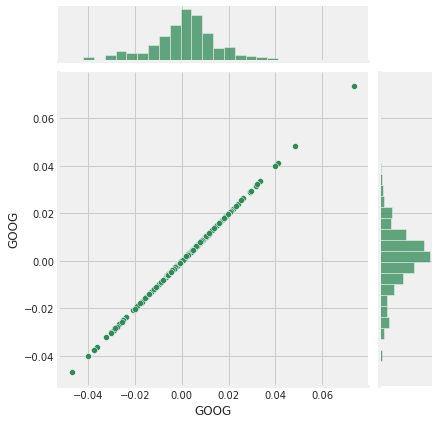

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

#Use joint plot to compare the daily returns of google and microsoft 

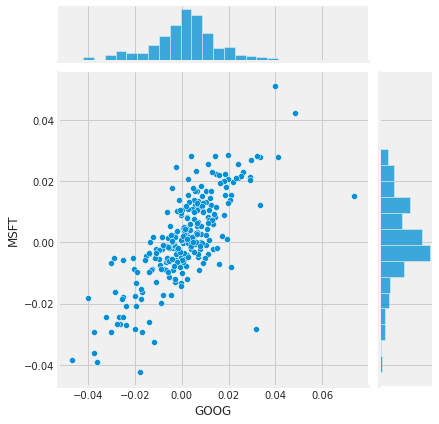

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

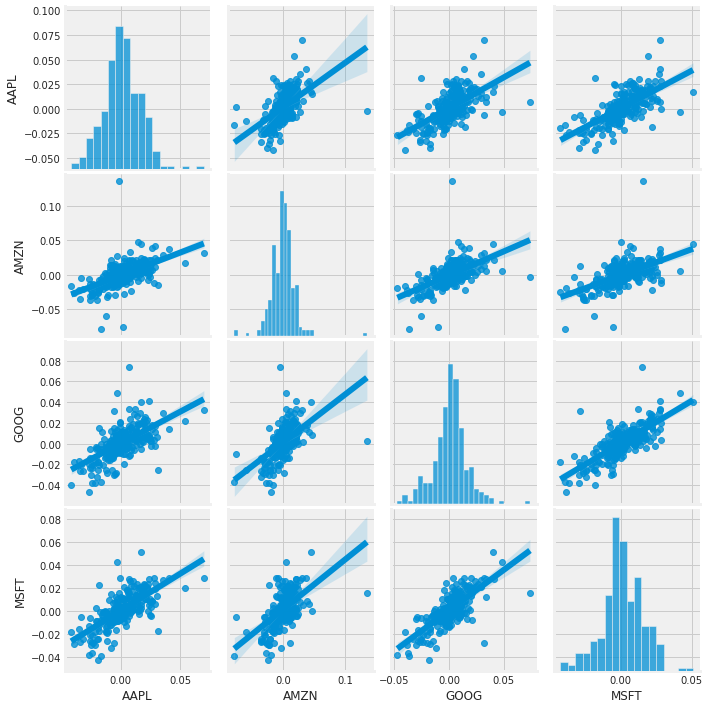

In [ ]:
sns.pairplot(tech_rets, kind='reg')

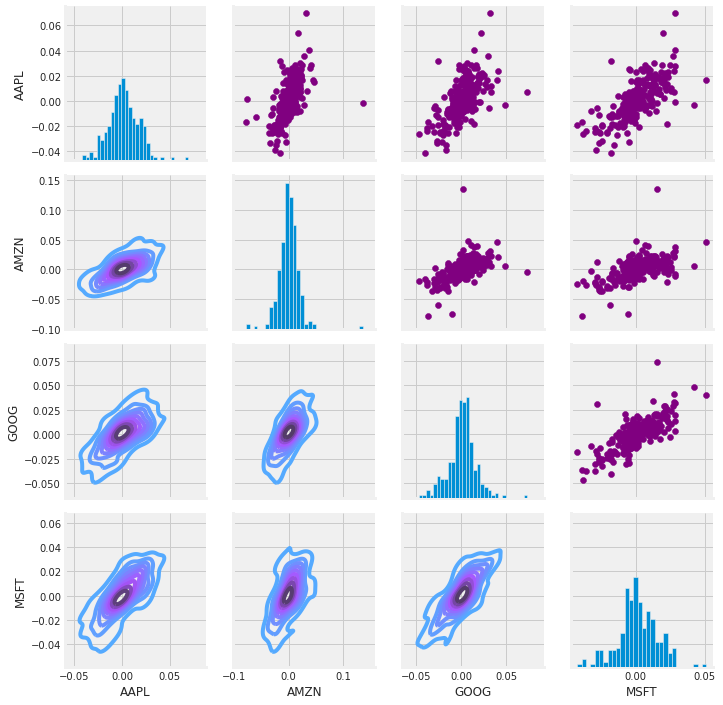

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

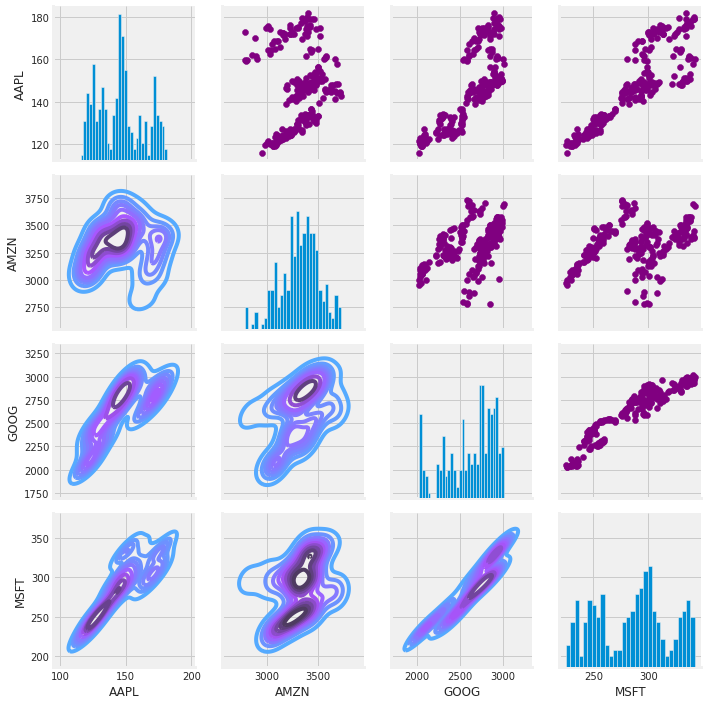

In [ ]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

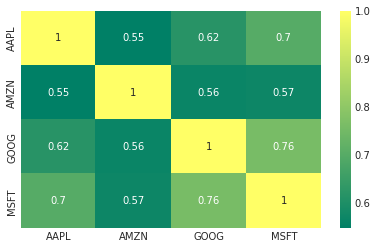

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

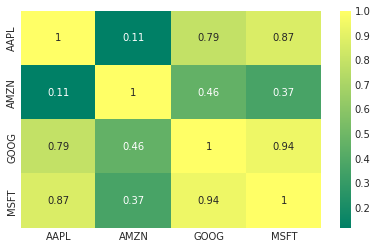

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

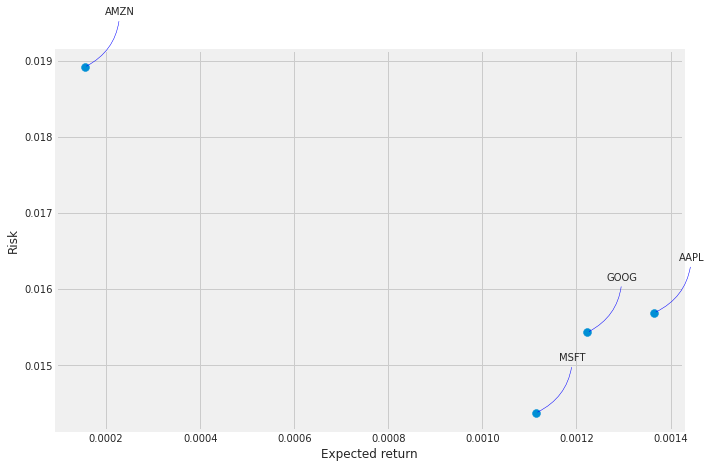

In [ ]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#Predicting a closing price stock price of Apple

In [ ]:
df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-26,122.589996,124.849998,121.199997,121.260002,120.543549,164560400
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.034966,116307900
2021-03-02,128.410004,128.720001,125.010002,125.120003,124.380745,102260900
2021-03-03,124.809998,125.709999,121.839996,122.059998,121.338821,112966300
2021-03-04,121.750000,123.599998,118.620003,120.129997,119.420219,178155000


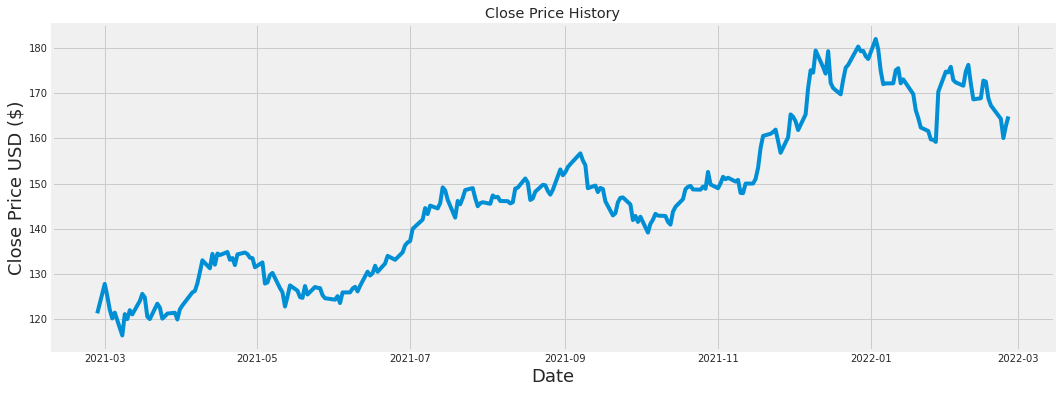

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

241

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07463826],
       [0.17410512],
       [0.13343493],
       [0.08682403],
       [0.0574257 ],
       [0.07707537],
       [0.        ],
       [0.07204868],
       [0.05514095],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.14028941],
       [0.12795129],
       [0.06351864],
       [0.05529318],
       [0.10708301],
       [0.09413558],
       [0.05681639],
       [0.06443254],
       [0.0738766 ],
       [0.07661842],
       [0.05392233],
       [0.088195  ],
       [0.10114242],
       [0.1453161 ],
       [0.15003807],
       [0.17578069],
       [0.21325211],
       [0.25346536],
       [0.22665661],
       [0.27524743],
       [0.23869002],
       [0.2763138 ],
       [0.27113488],
       [0.28149273],
       [0.25514092],
       [0.26108151],
       [0.23731917],
       [0.2735721 ],
       [0.27966492],
       [0.27463824],
       [0.26230012],
       [0.2607768 ],
       [0.23000773],
       [0.2464584 ],
       [0.17501902],
       [0.178

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.07463826, 0.17410512, 0.13343493, 0.08682403, 0.0574257 ,
       0.07707537, 0.        , 0.07204868, 0.05514095, 0.08530082,
       0.07113478, 0.11622236, 0.14028941, 0.12795129, 0.06351864,
       0.05529318, 0.10708301, 0.09413558, 0.05681639, 0.06443254,
       0.0738766 , 0.07661842, 0.05392233, 0.088195  , 0.10114242,
       0.1453161 , 0.15003807, 0.17578069, 0.21325211, 0.25346536,
       0.22665661, 0.27524743, 0.23869002, 0.2763138 , 0.27113488,
       0.28149273, 0.25514092, 0.26108151, 0.23731917, 0.2735721 ,
       0.27966492, 0.27463824, 0.26230012, 0.2607768 , 0.23000773,
       0.2464584 , 0.17501902, 0.17882721, 0.20380817, 0.21096736,
       0.15978673, 0.14546845, 0.09763894, 0.13115006, 0.16892608,
       0.15095197, 0.12932214, 0.12688504, 0.16679357, 0.1381569 ])]
[0.16359480369037271]

[array([0.07463826, 0.17410512, 0.13343493, 0.08682403, 0.0574257 ,
       0.07707537, 0.        , 0.07204868, 0.05514095, 0.08530082,
       0.07113478, 0.11622236, 0.14

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

181/181 [==============================] - 8s 31ms/step - loss: 0.0183


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.656909091424048

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


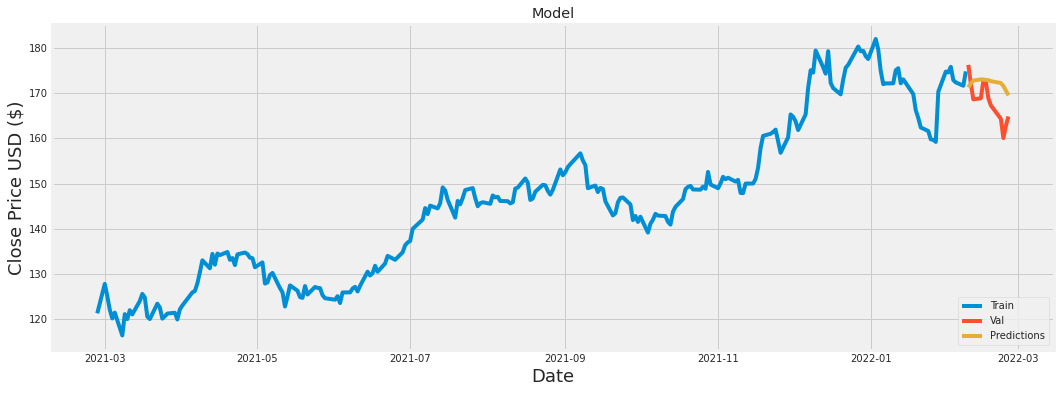

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-02-09,176.279999,171.276901
2022-02-10,172.119995,172.165848
2022-02-11,168.639999,172.803238
2022-02-14,168.880005,173.054367
2022-02-15,172.789993,173.017242
2022-02-16,172.550003,172.960876
2022-02-17,168.880005,172.894897
2022-02-18,167.300003,172.664352
2022-02-22,164.320007,172.255341
